In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from gp2 import Runner

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmpiamt7x92GP2
Using default discriminator (CNN)


In [4]:
# load our dataset  (images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_norm.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_norm.npy')

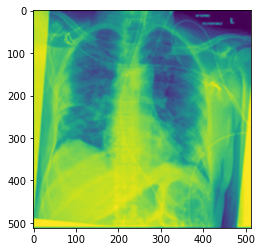

In [5]:
plt.imshow(images[500])

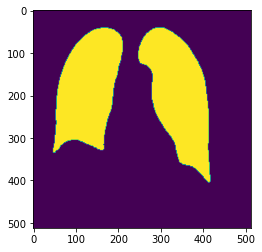

In [6]:
plt.imshow(masks[500])

In [7]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [8]:
#
#
R.setup_data(images, masks, dataset_size=3616, weights=weights)

Weights OK!


In [9]:
RUNS = 5

In [10]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
3/3 [==============================] - 27s 6s/step - loss: 1.2721 - dice_coeff: 0.3997 - val_loss: 1.3282 - val_dice_coeff: 0.3623
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 1.0217 - dice_coeff: 0.4986 - val_loss: 1.3292 - val_dice_coeff: 0.3617
Epoch 3/100
3/3 [==============================] - 4s 2s/step - loss: 0.8647 - dice_coeff: 0.5689 - val_loss: 1.3285 - val_dice_coeff: 0.3612
Epoch 4/100
3/3 [==============================] - 4s 2s/step - loss: 0.7906 - dice_coeff: 0.6013 - val_loss: 1.3269 - val_dice_coeff: 0.3608
Epoch 5/100
3/3 [==============================] - 4s 2s/step - loss: 0.7040 - dice_coeff: 0.6385 - val_loss: 1.3256 - val_dice_coeff: 0.3604
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.6588 - dice_coeff: 0.6601 - val_loss: 1.3247 - val_dice_coeff: 0.3599
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.6166 - dice_coeff: 0.6777 - val_loss: 1.3234 - val_dice_coeff: 0

In [11]:
R.classifier_scores

[[1.3316417932510376, 0.3146679997444153],
 [1.3058911561965942, 0.2998207211494446],
 [1.3020092248916626, 0.2843092083930969],
 [1.3213449716567993, 0.2448406219482422],
 [1.37523353099823, 0.2004295438528061]]

In [12]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [2.3730871134830522e-07, 1.0]]

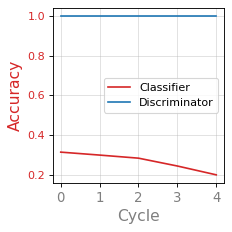

In [13]:
R.plot()